In [12]:
import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt 

This notebook compares the optimization of Fidelity with Julia Optim, Python BasinHopping, and Matlab GlobalSearch. We can see that Python BasinHopping and Matlab GlobalSearch deliver similar (or worse) results than Julia Optim. 

In [13]:
data_python = np.load( 'julia_vs_python.npy' )
data_matlab = loadmat( 'Julia_vs_matlab.mat' )['infids_comparison']

In [15]:
data = [ data_matlab[:,:,0], data_matlab[:,:,1], data_python[:,:,1] ]

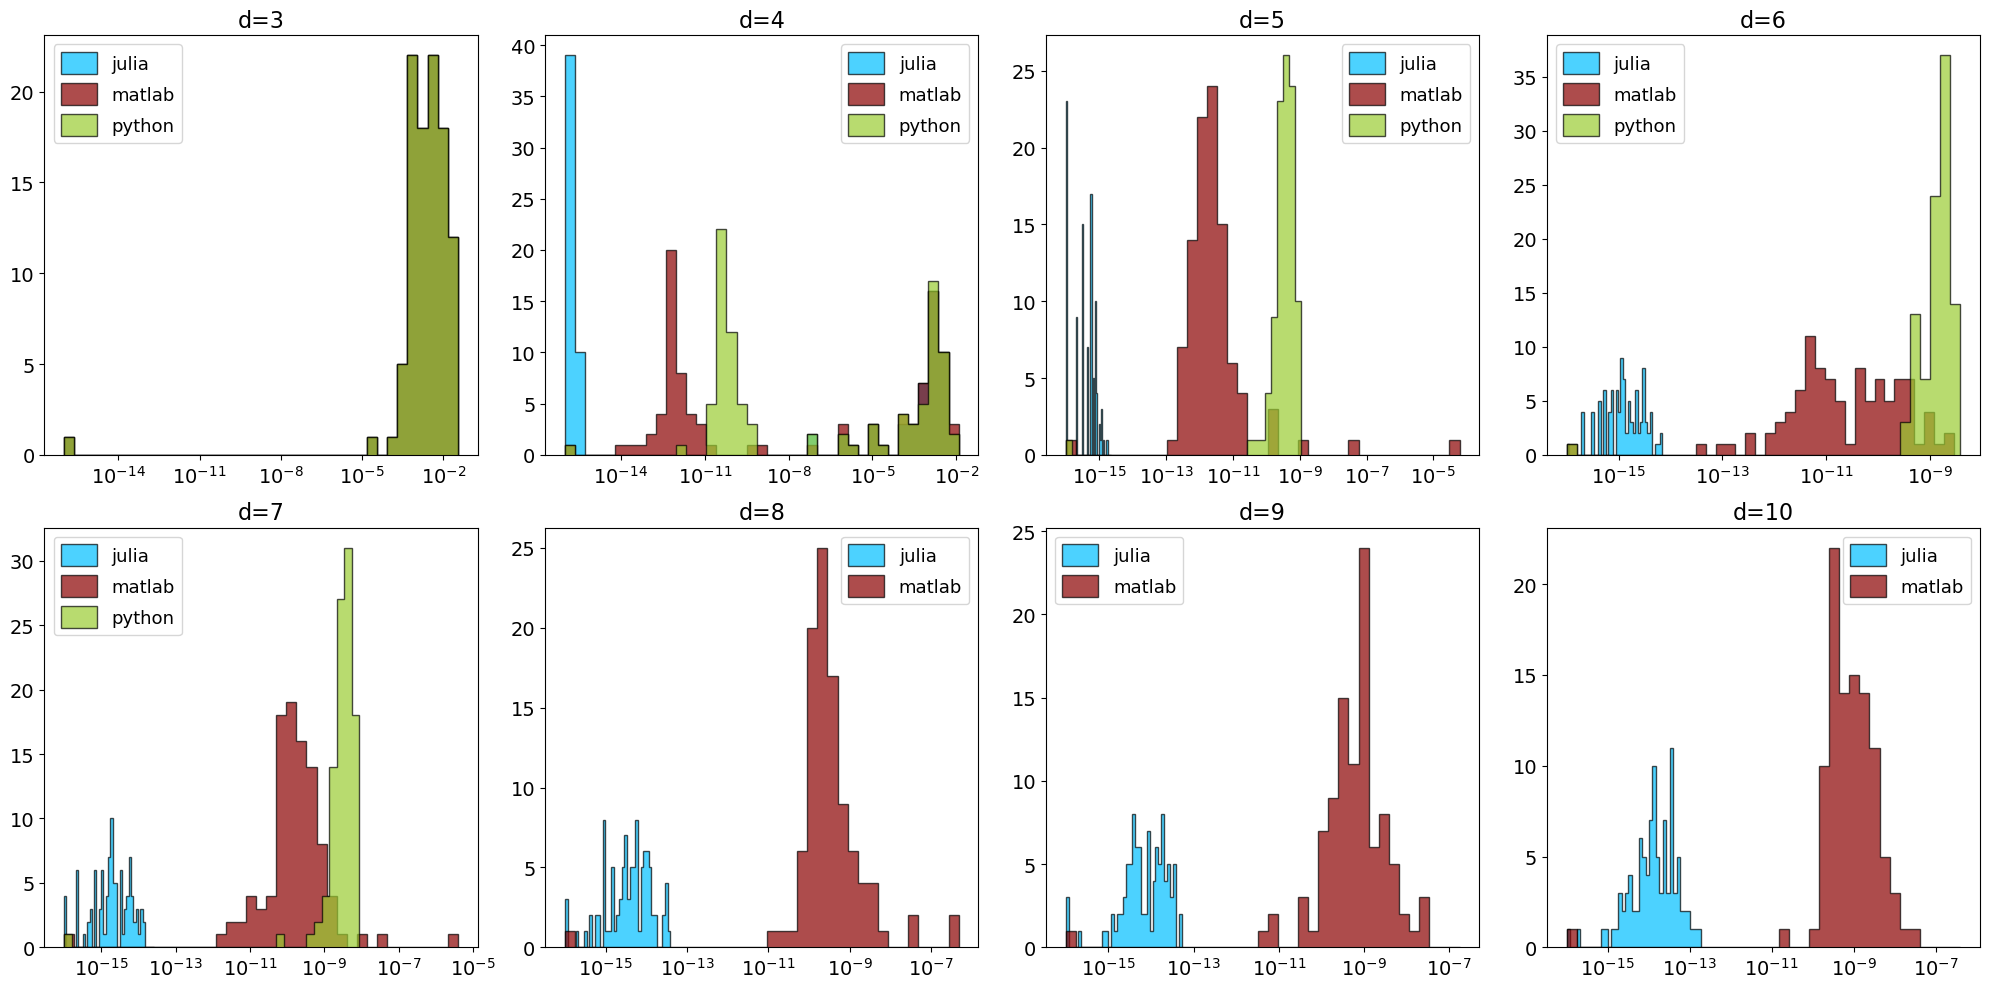

In [16]:
#All dimensions histogram, all layers included
lay=3;MC=1000; DimN=8
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,10))

for j in [0,1,2]:
    
    if j ==2 :
        DimN = 5

    infi = data[j]

    x=infi.min(axis=1)
    y=infi.max(axis=1)

    infi=infi-x.reshape(-1,1)+1e-16

    x=infi.min(axis=1)
    y=infi.max(axis=1)

    plt.matplotlib.rc("xtick",labelsize=14)
    plt.matplotlib.rc("ytick",labelsize=14)

    bins=40
    logbins=[np.logspace(np.log10(x[i].min()),np.log10(y[i].max()),bins) for i in range(DimN)]

    colors=["yellowgreen", "darkred", "deepskyblue", "gold", "steelblue", "palegreen","navy","darkgray"]
    labels=["julia", "matlab", "python"]
    hatches=["/","\ ","|" ]

    axs=ax.flatten()

    for i in range(DimN):

        axs[i].hist(infi[i],
                    # bins = 100, 
                    bins=logbins[i],
                    histtype="step",
                    facecolor=colors[2-j],
                    edgecolor="k",
                    fill=True,
                    alpha= 0.7,
                    label=labels[j]
                    )
        
        axs[i].legend(handleheight=1.5,prop={"size":13}) #prop={'size': 7})
        axs[i].set_xscale("log")
        axs[i].set_title("d="+str(i+3),size=16)

    fig.tight_layout()
    # fig.savefig("HaarDistrHist.pdf")